In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [3]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

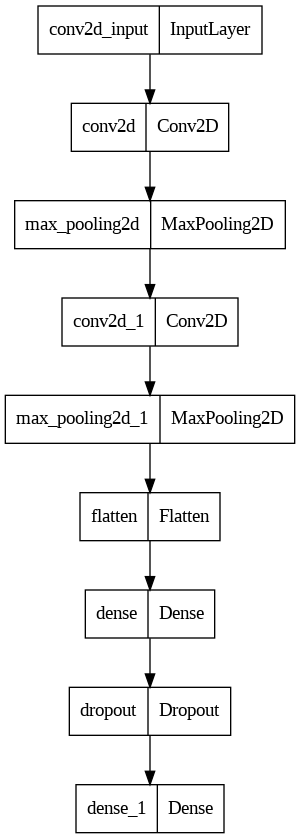

In [6]:
keras.utils.plot_model(model)

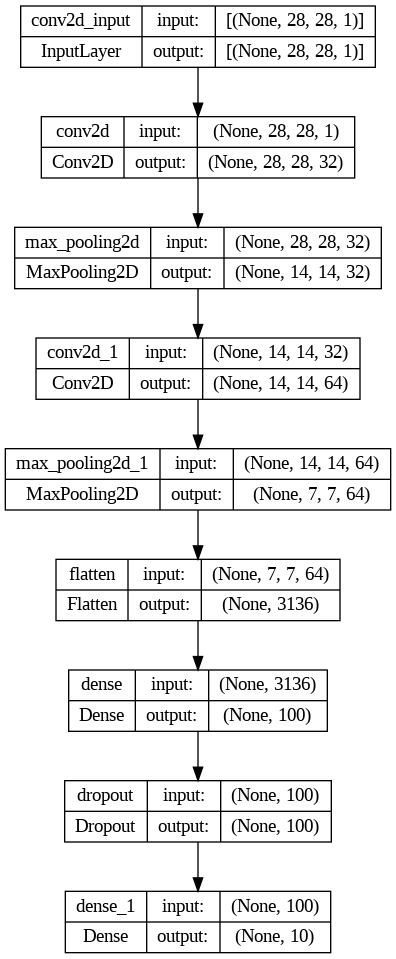

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 93s 59ms/step - loss: 0.5468 - accuracy: 0.8036 - val_loss: 0.3408 - val_accuracy: 0.8745
Epoch 2/20
   3/1500 [..............................] - ETA: 55s - loss: 0.4445 - accuracy: 0.8646 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 66s 44ms/step - loss: 0.3557 - accuracy: 0.8722 - val_loss: 0.2762 - val_accuracy: 0.8978
Epoch 3/20
1500/1500 [==============================] - 67s 45ms/step - loss: 0.3036 - accuracy: 0.8900 - val_loss: 0.2542 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2725 - accuracy: 0.9023 - val_loss: 0.2627 - val_accuracy: 0.9017
Epoch 5/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2471 - accuracy: 0.9109 - val_loss: 0.2323 - val_accuracy: 0.9139
Epoch 6/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2265 - accuracy: 0.9172 - val_loss: 0.2319 - val_accuracy: 0.9156
Epoch 7/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2088 - accuracy: 0.9251 - val_loss: 0.2188 - val_accuracy: 0.9211
Epoch 8/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.1935 - accuracy: 0.9283 - val_loss: 0.2167 - val_accura

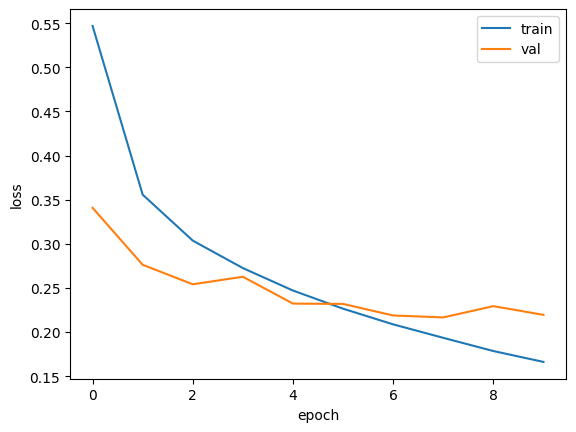

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 13ms/step - loss: 0.2167 - accuracy: 0.9219


[0.21665018796920776, 0.921916663646698]

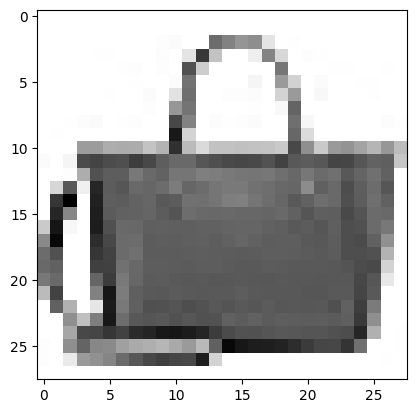

In [11]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [12]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 111ms/step
[[7.9081246e-14 3.1260500e-23 6.5551236e-19 1.7188023e-19 1.1986788e-17
  6.7749939e-15 1.4907282e-16 2.3602353e-14 1.0000000e+00 3.3379602e-16]]


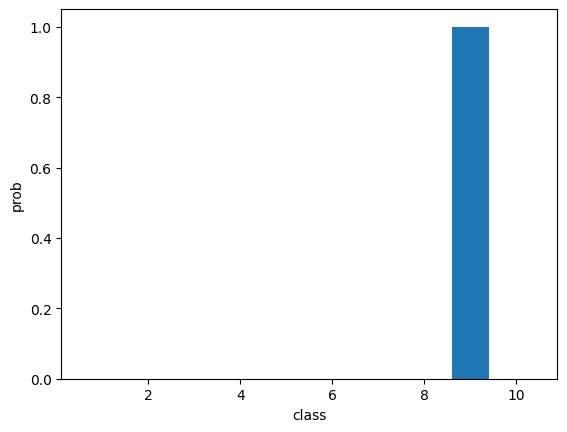

In [13]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [14]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [15]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [16]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [17]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2315 - accuracy: 0.9152


[0.23152416944503784, 0.9151999950408936]

In [17]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [18]:
model.layers

In [19]:
conv =model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [20]:
conv_weights =conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03681712 0.28057873


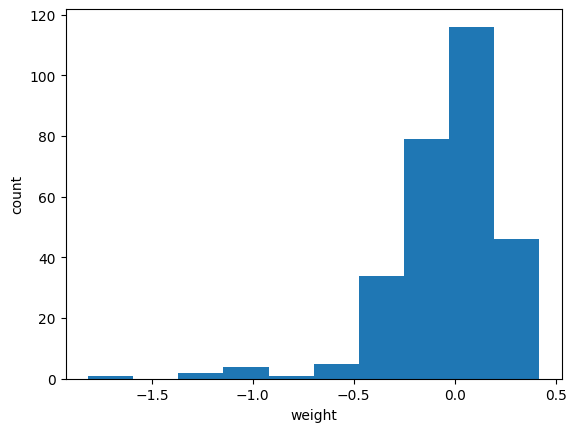

In [21]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

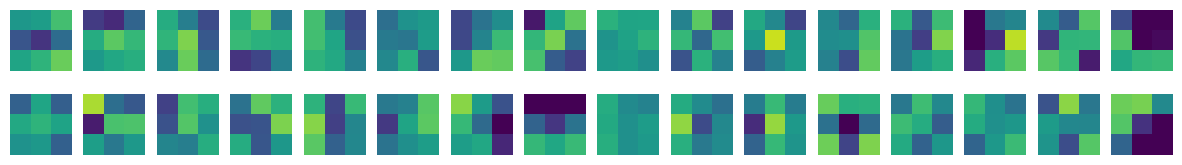

In [45]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [23]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [26]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [27]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0009223626 0.0797437


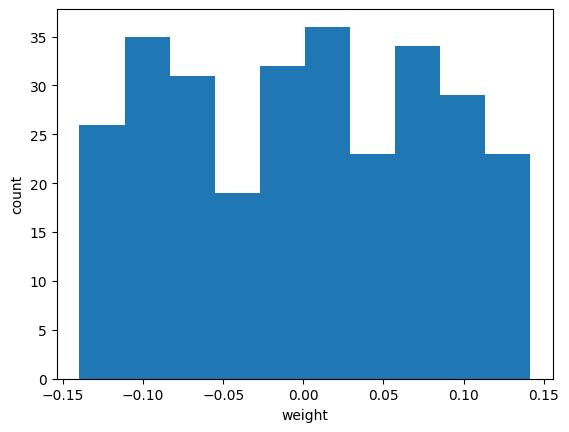

In [28]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

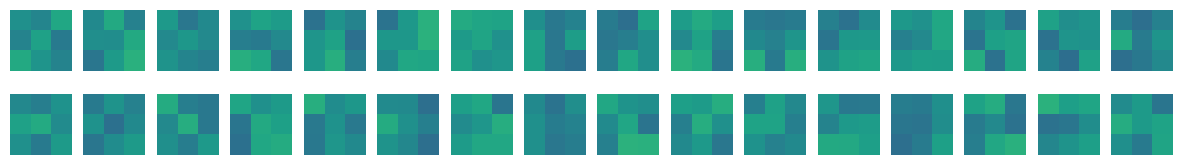

In [44]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [32]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [33]:
conv_acti = keras.Model(model.input, model.layers[0].output)

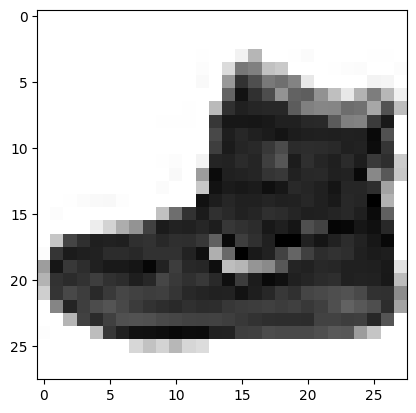

In [30]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [34]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 54ms/step


In [35]:
print(feature_maps.shape)

(1, 28, 28, 32)


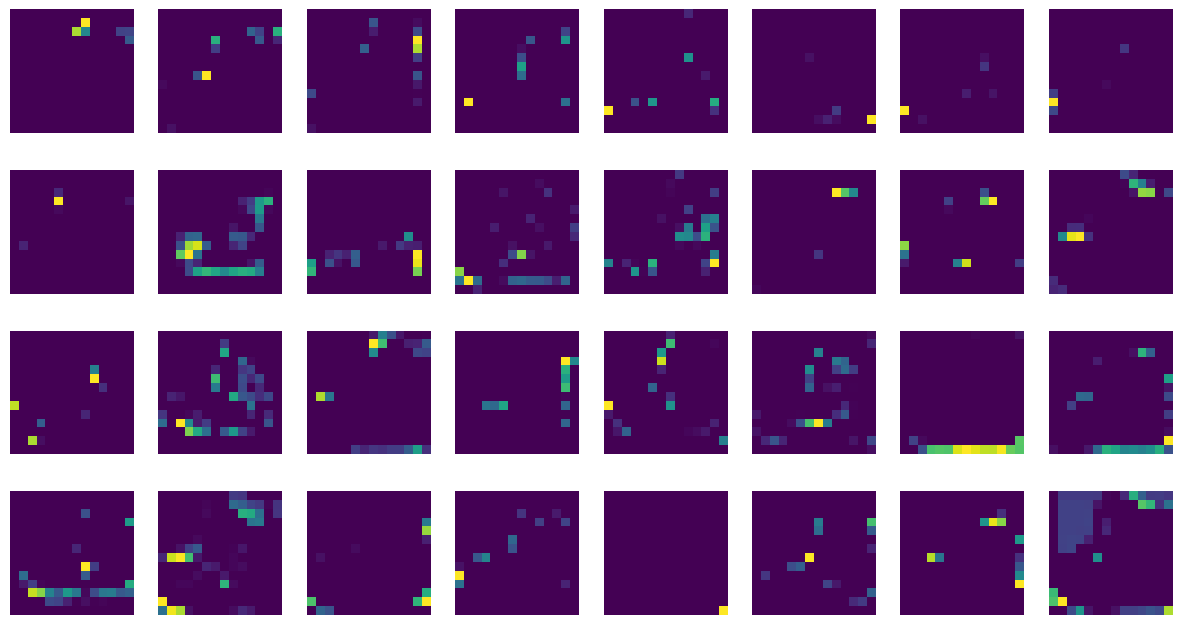

In [42]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [38]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [39]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 95ms/step


In [40]:
print(feature_maps.shape)

(1, 14, 14, 64)


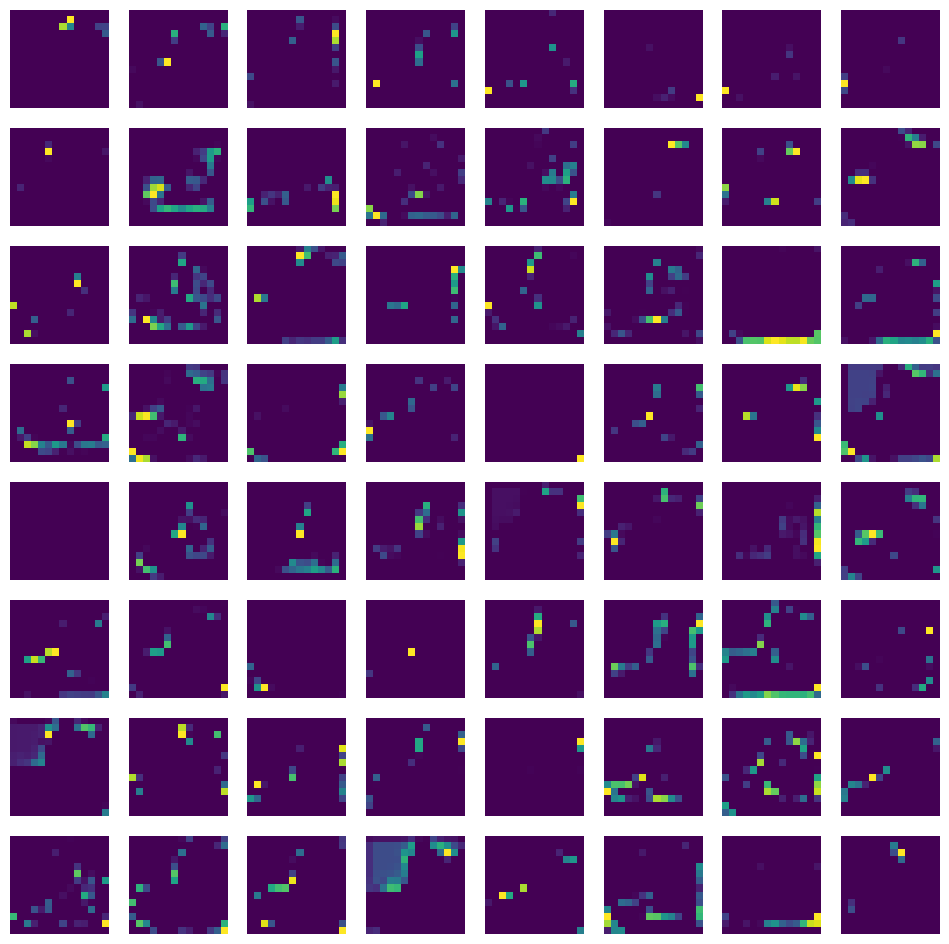

In [43]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()